In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score,mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.special import boxcox,boxcox1p, inv_boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='sex', ylabel='count'>

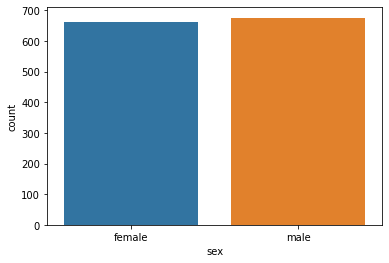

In [4]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

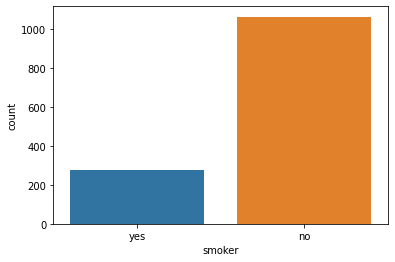

In [5]:
sns.countplot(x='smoker',data=df)

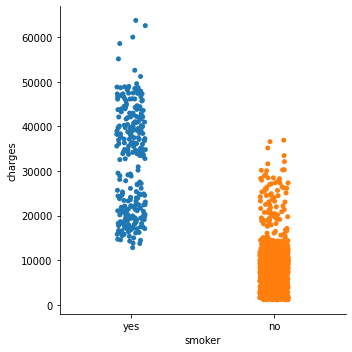

In [6]:
sns.catplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

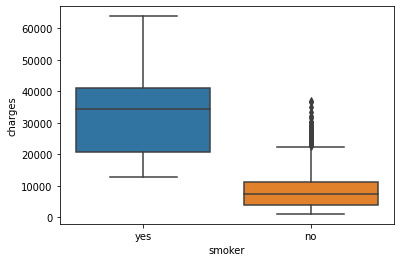

In [9]:
sns.boxplot(x='smoker',y='charges',data=df)

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

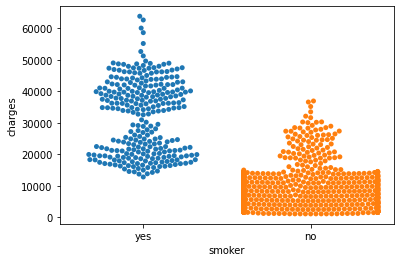

In [10]:
sns.swarmplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

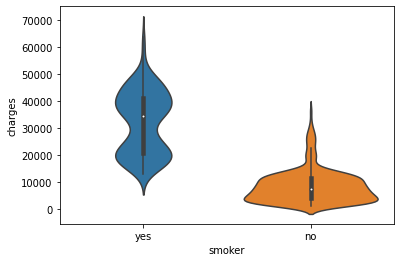

In [11]:
sns.violinplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

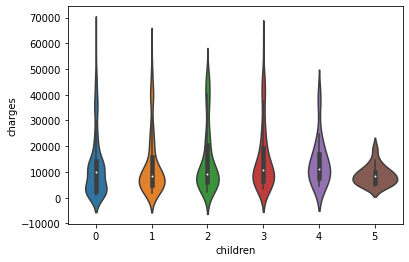

In [12]:
sns.violinplot(x='children',y='charges',data=df)

In [15]:
gender_charges = df.groupby('sex')['charges'].mean()
gender_charges

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex'>

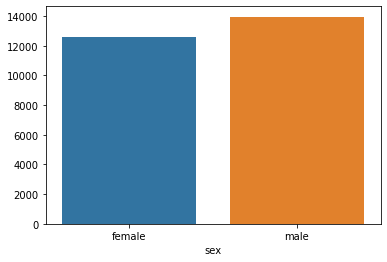

In [18]:
sns.barplot(gender_charges.index,gender_charges.values)

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
region_charges = df.groupby('region')['charges'].mean()
region_charges

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region'>

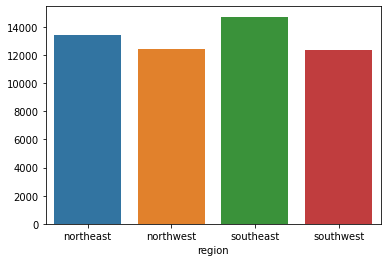

In [25]:
sns.barplot(region_charges.index,region_charges.values)

In [27]:
df = pd.get_dummies(df,columns=['sex','smoker','region'])

In [28]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [31]:
x = df.drop('charges',axis=1)
y = df.charges

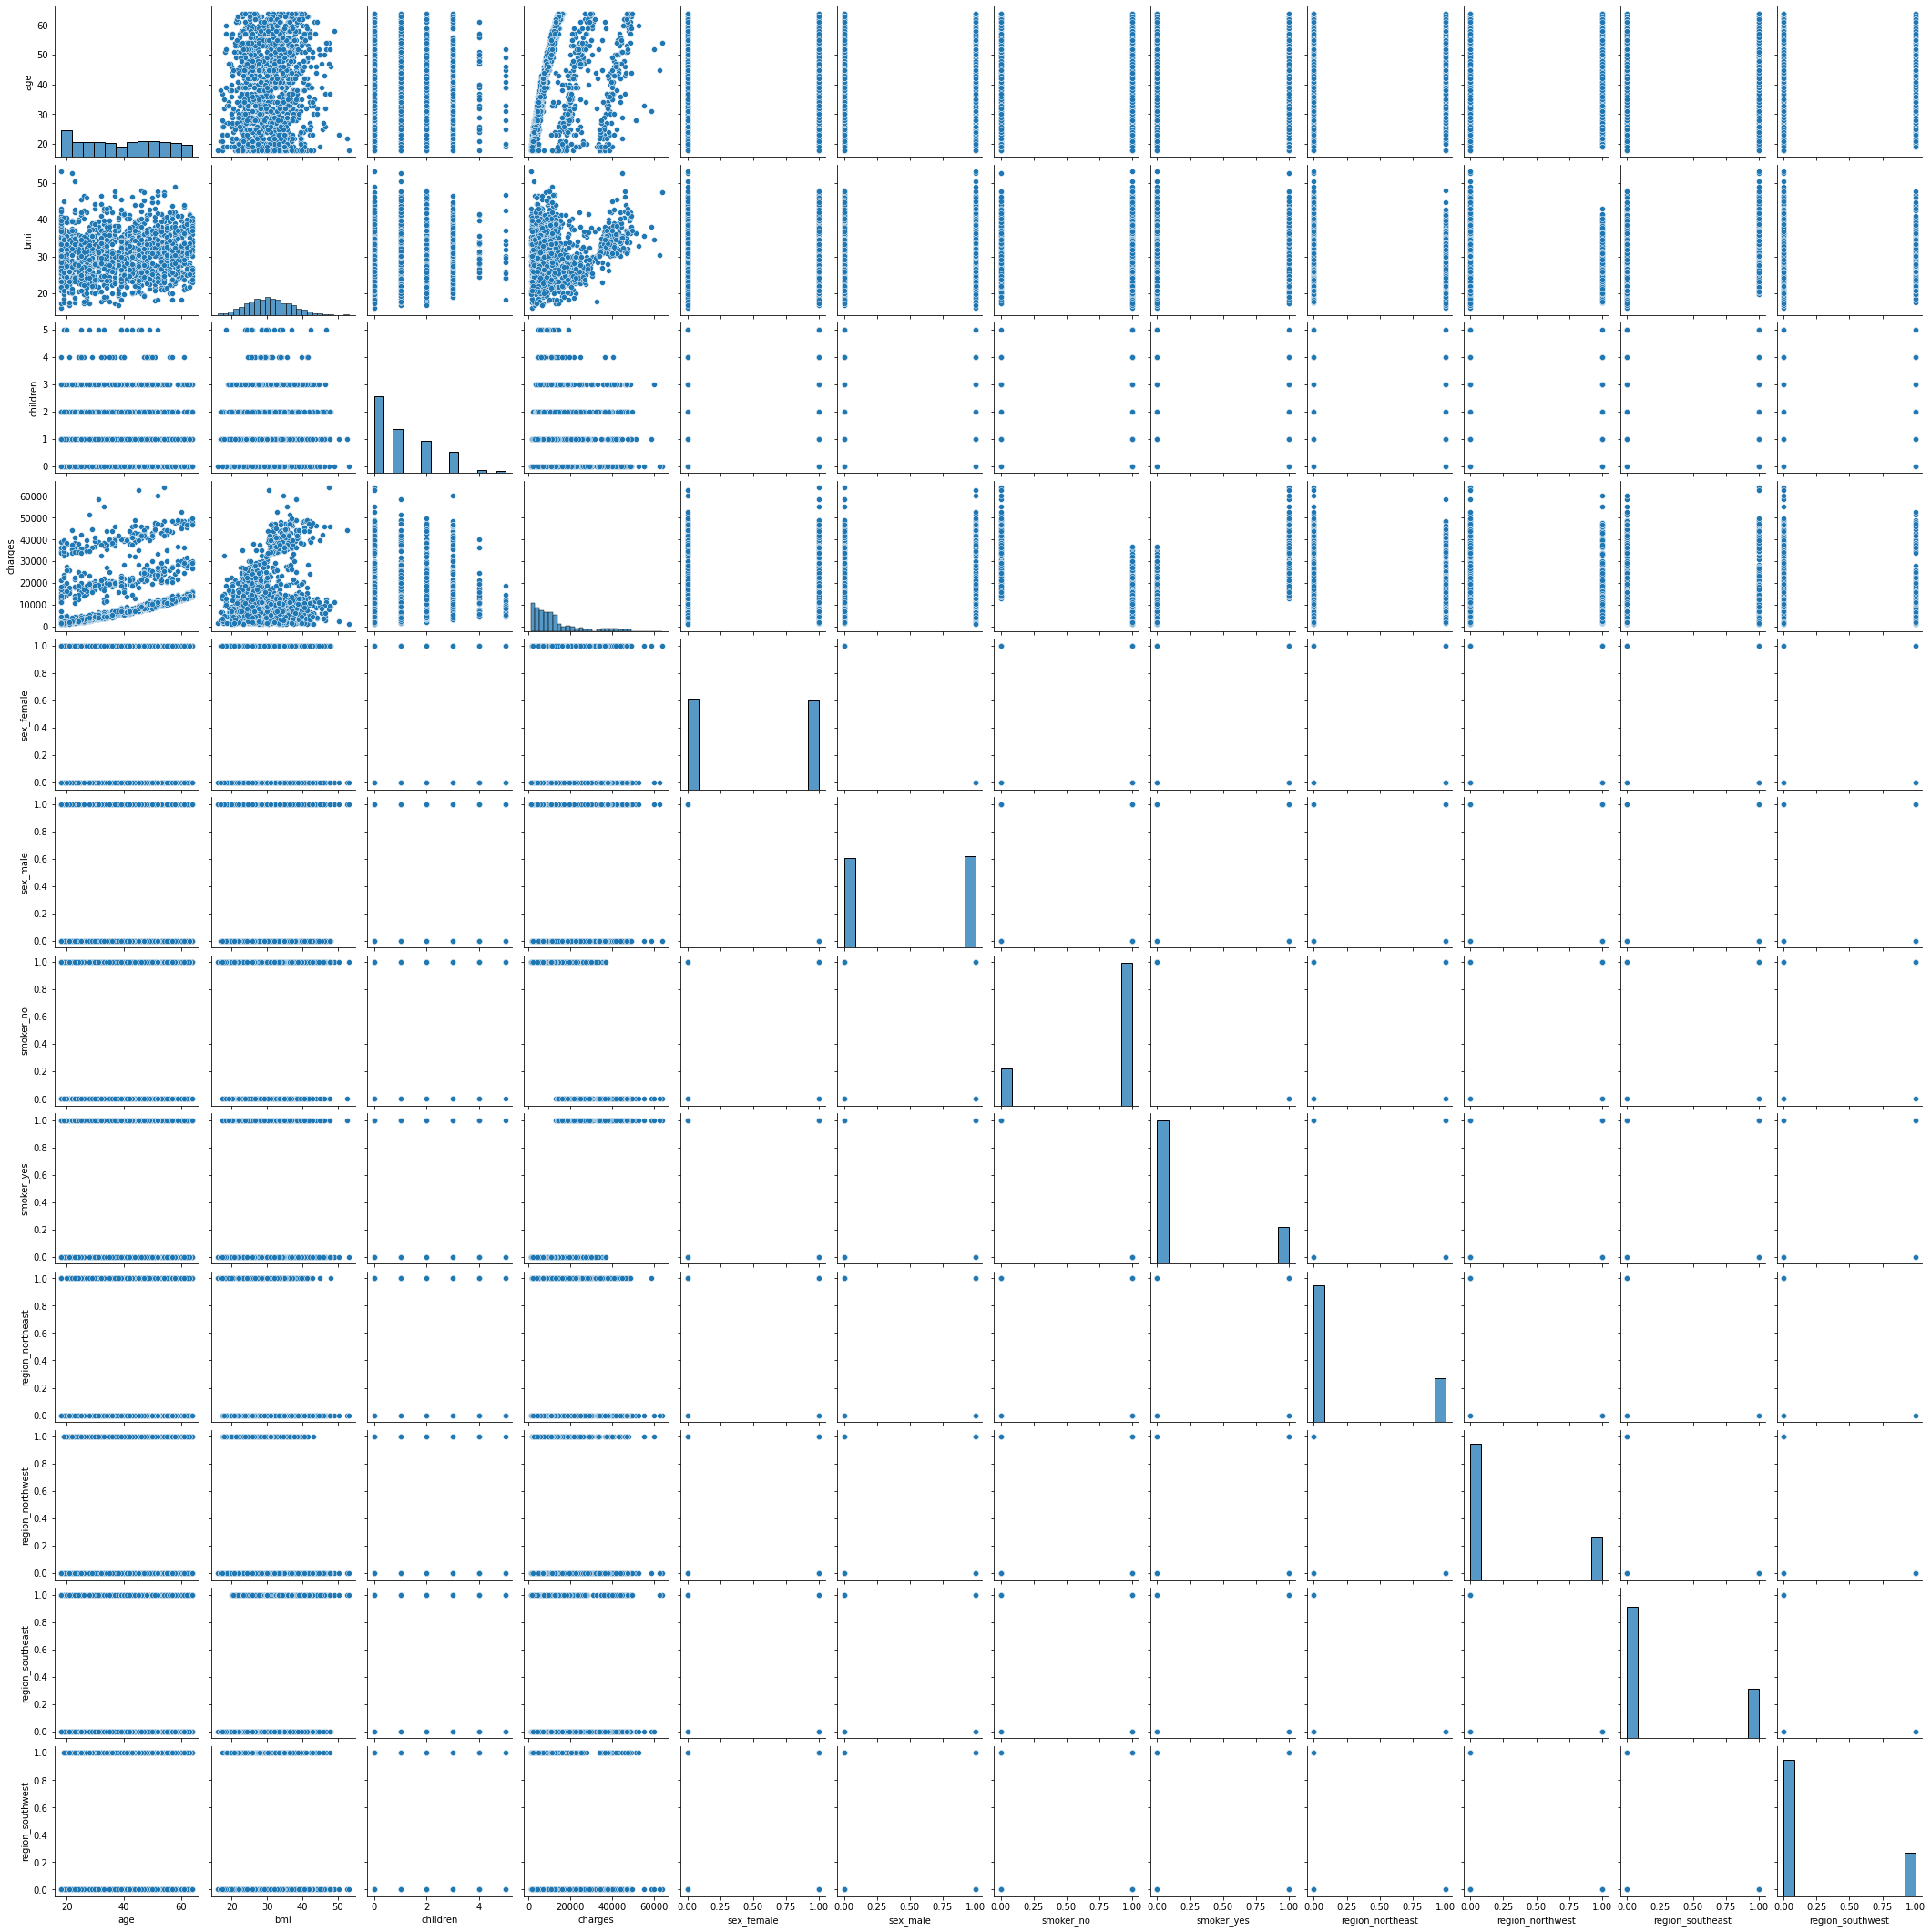

In [32]:
sns.pairplot(df)

In [36]:
x = StandardScaler().fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=100)

## Linear regression

In [39]:
model_lin = LinearRegression().fit(x_train,y_train)

In [40]:
pred = model_lin.predict(x_test)

In [41]:
r2_score(y_test,pred)

0.7936796989043644

In [43]:
np.sqrt(mean_squared_error(y_test,pred))

5687.942548148356

---

## K Neighbors Regression

In [44]:
params={'n_neighbors':range(1,51)}

In [46]:
model_gd = GridSearchCV(KNeighborsRegressor(),params)

In [47]:
model_gd.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 51)})

In [48]:
model_gd.best_params_

{'n_neighbors': 5}

In [49]:
model_knn = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)

In [50]:
pred_knn = model_knn.predict(x_test)

In [51]:
r2_score(y_test,pred_knn)

0.8221390786622088

In [53]:
np.sqrt(mean_squared_error(y_test,pred_knn))

5281.101183688935

In [55]:
error = []
for i in range(1,51):
    model_k = KNeighborsRegressor(n_neighbors=i).fit(x_train,y_train)
    error.append(np.sqrt(mean_squared_error(y_test,model_k.predict(x_test))))

In [66]:
min(error)

5207.960222946216

In [67]:
error.index(min(error))

6

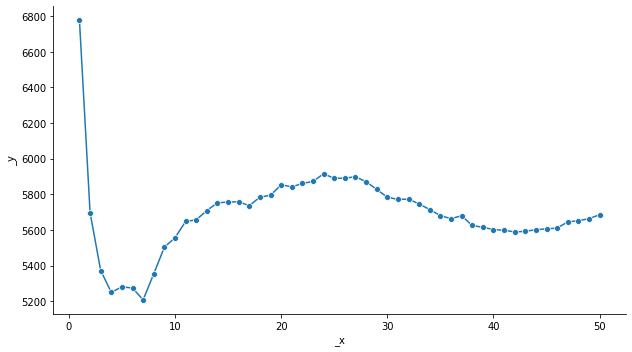

In [64]:
sns.relplot(x=range(1,51),y=error,kind='line',marker='o',aspect=16/9)

Text(0, 0.5, 'Error')

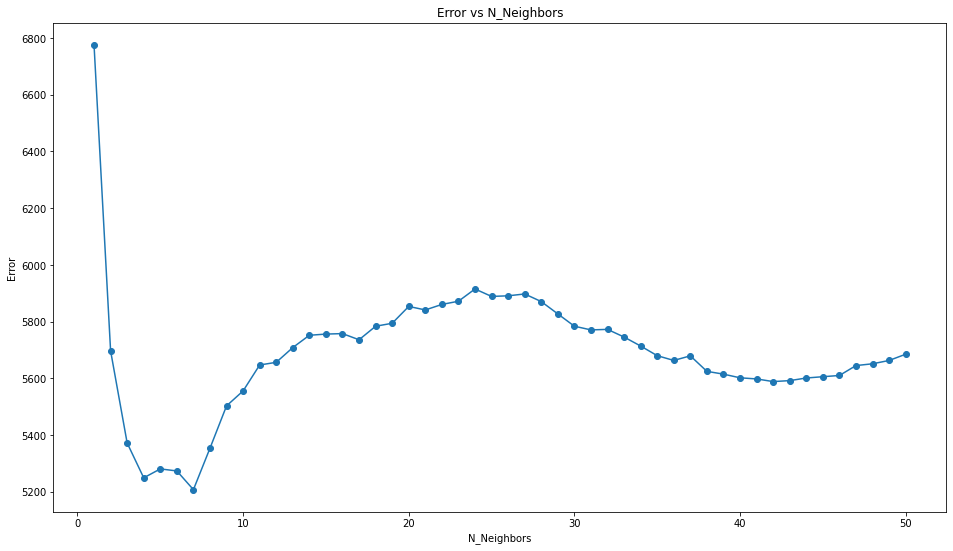

In [61]:
plt.figure(figsize=(16,9))
plt.plot(range(1,51),error,marker='o')
plt.title('Error vs N_Neighbors')
plt.xlabel('N_Neighbors')
plt.ylabel('Error')

In [69]:
pred_train = model_knn.predict(x_train)

In [70]:
r2_score(y_train,pred_train)

0.8545054634651245

---

## Cross Validation

In [72]:
cvmod = KFold(n_splits=10,random_state=100,shuffle=True)
score = cross_val_score(model_knn,x_train,y_train,scoring='r2',cv=cvmod,n_jobs=-1)

In [73]:
score

array([0.81119631, 0.72839325, 0.74972154, 0.77980449, 0.76893946,
       0.74661636, 0.79044563, 0.74182861, 0.77328855, 0.70601357])

In [74]:
np.mean(score)

0.7596247773926361